In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [4]:
normal_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke"

In [5]:
normal_folder=os.listdir(normal_path)
stroke_folder=os.listdir(stroke_path)

In [6]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [9]:
data=[]
for img_file in normal_folder:
    image = Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [10]:
for img_file in stroke_folder:
    image = Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [11]:
len(data)

2501

In [12]:
data[0].shape

(224, 224, 3)

In [13]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
normal_label=[0]*len(normal_folder)
stroke_label=[1]*len(stroke_folder)

In [17]:
Target_label=normal_label+stroke_label

In [18]:
len(Target_label)

2501

In [19]:
x=np.array(data)
y=np.array(Target_label)

In [20]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [21]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


In [23]:
x_train_s=x_train/255
x_test_s=x_test/255

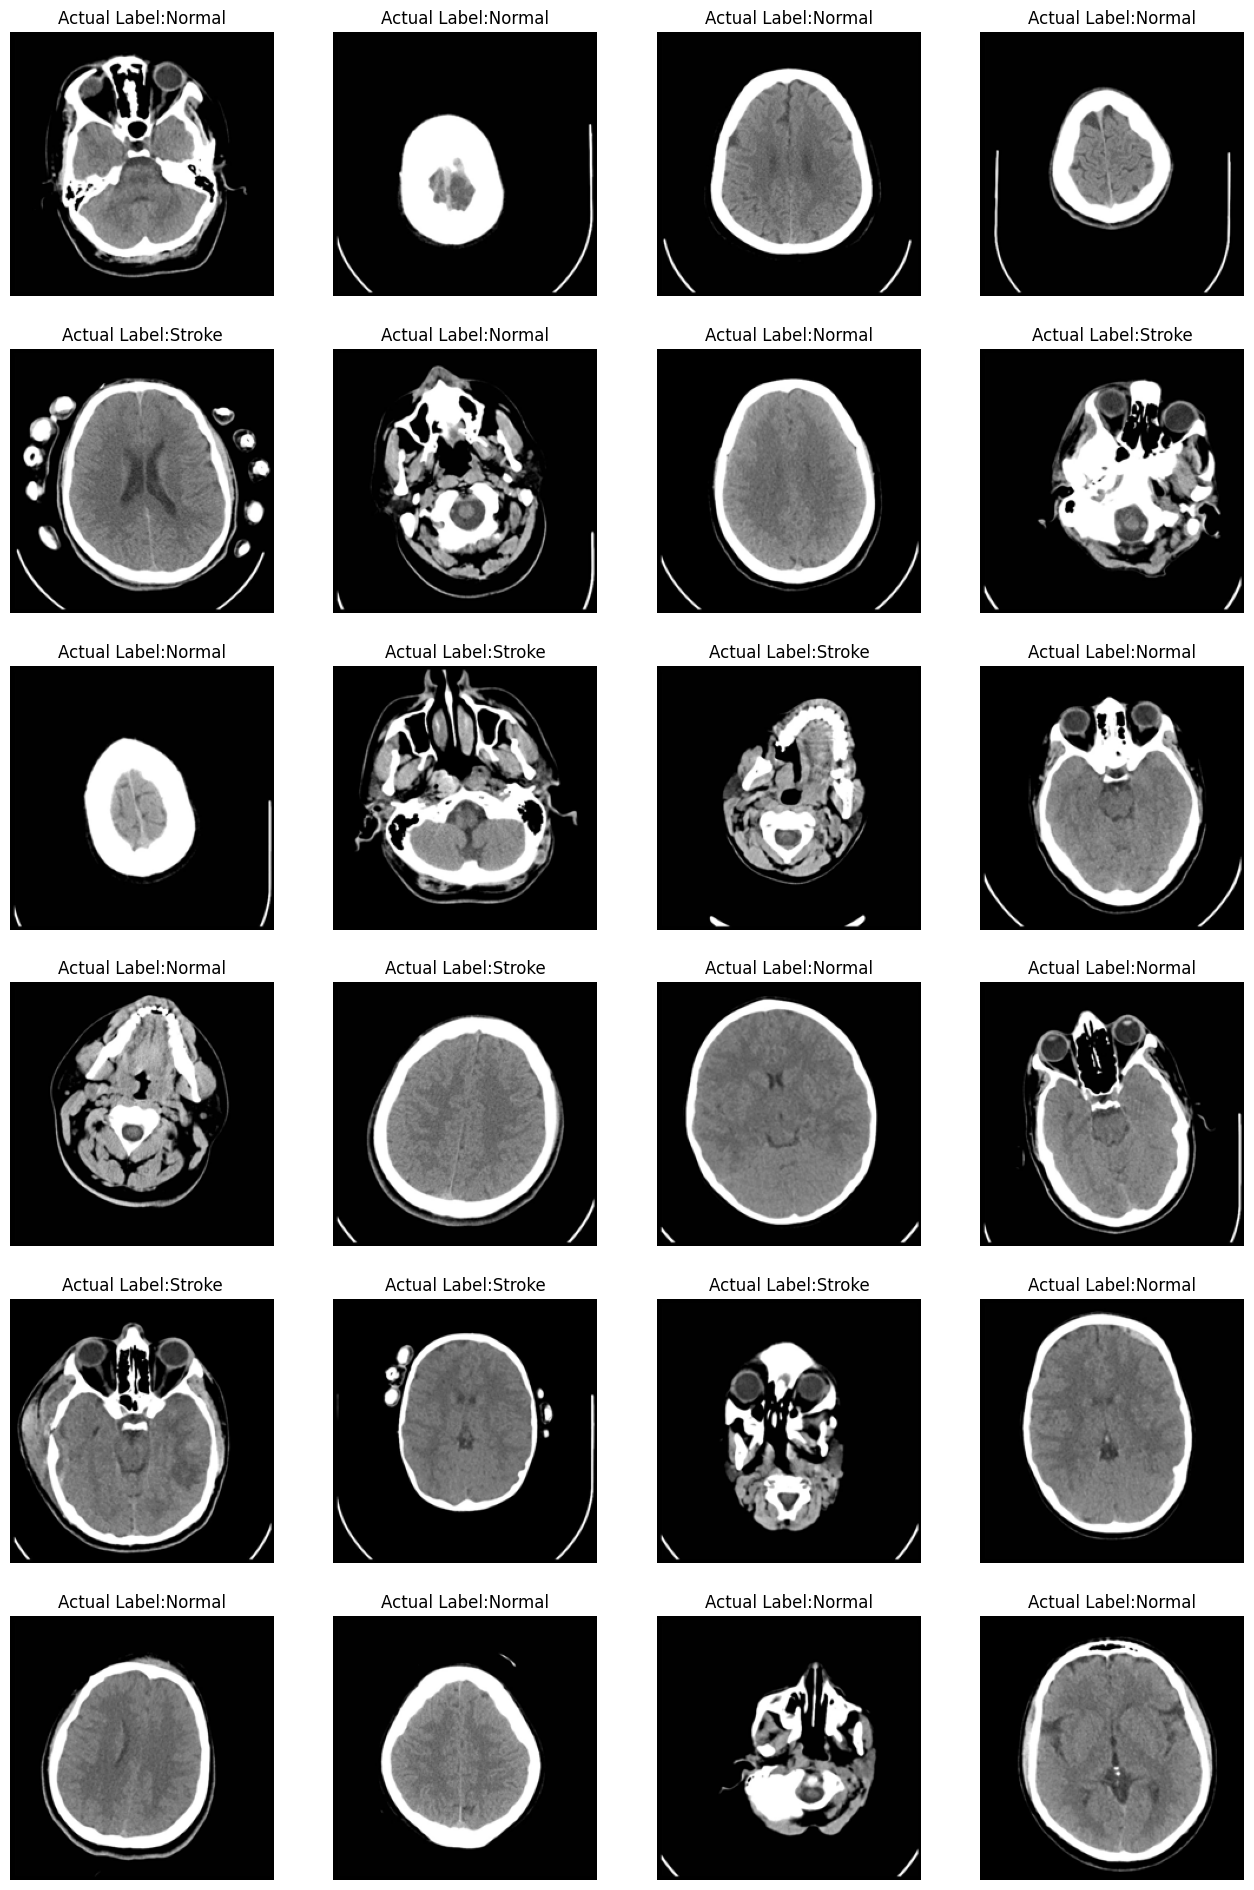

In [24]:
class_labels=["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

In [28]:

model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)       

In [29]:
history=model.fit(x_train_s,y_train,batch_size=32,epochs=10,validation_data=(x_test_s,y_test))

Epoch 1/10


I0000 00:00:1707054832.562786    1712 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


71/71 [==============================] - 14s 87ms/step - loss: 0.6467 - accuracy: 0.6653 - val_loss: 15.5425 - val_accuracy: 0.7171
Epoch 2/10
71/71 [==============================] - 4s 58ms/step - loss: 8.2849 - accuracy: 0.8769 - val_loss: 133.5263 - val_accuracy: 0.8566
Epoch 3/10
71/71 [==============================] - 4s 58ms/step - loss: 8.3030 - accuracy: 0.8973 - val_loss: 146.5209 - val_accuracy: 0.9084
Epoch 4/10
71/71 [==============================] - 4s 58ms/step - loss: 3.9939 - accuracy: 0.9404 - val_loss: 36.7458 - val_accuracy: 0.9004
Epoch 5/10
71/71 [==============================] - 4s 58ms/step - loss: 2.7568 - accuracy: 0.9596 - val_loss: 47.4934 - val_accuracy: 0.9163
Epoch 6/10
71/71 [==============================] - 4s 58ms/step - loss: 0.2380 - accuracy: 0.9720 - val_loss: 3.4300 - val_accuracy: 0.9084
Epoch 7/10
71/71 [==============================] - 4s 58ms/step - loss: 1.1897 - accuracy: 0.9902 - val_loss: 11.4725 - val_accuracy: 0.9363
Epoch 8/10
71/7

In [30]:
loss,acc=model.evaluate(x_test_s,y_test)
print("Loss on Test Data",loss)
print("Accuracy on Test Data",acc)

loss,acc=model.evaluate(x_train_s,y_train)
print("Loss on Train Data",loss)
print("Accuracy on Train Data",acc)

8/8 [==============================] - 0s 20ms/step - loss: 11.2789 - accuracy: 0.9203
Loss on Test Data 11.278914451599121
Accuracy on Test Data 0.9203187227249146
71/71 [==============================] - 1s 20ms/step - loss: 0.5506 - accuracy: 0.9960
Loss on Train Data 0.5505619049072266
Accuracy on Train Data 0.9959999918937683


In [31]:
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 [==============================] - 0s 19ms/step


In [32]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 0 0 1 0 1 1 1 1 0]
Predicted Label: [0, 0, 0, 1, 0, 1, 1, 1, 1, 0]


In [33]:
print("-----Metrics Evaluation On Test Data-------")
print()
print("Confusion Matrix:",confusion_matrix(y_test,y_pred_test_label))
print("Classification Report",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Data-------

Confusion Matrix: [[136  15]
 [  5  95]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.90      0.93       151
           1       0.86      0.95      0.90       100

    accuracy                           0.92       251
   macro avg       0.91      0.93      0.92       251
weighted avg       0.92      0.92      0.92       251



In [34]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_prob = model.predict(x_test_s)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")

8/8 [==============================] - 0s 18ms/step
ROC - Area :0.9256953642384106


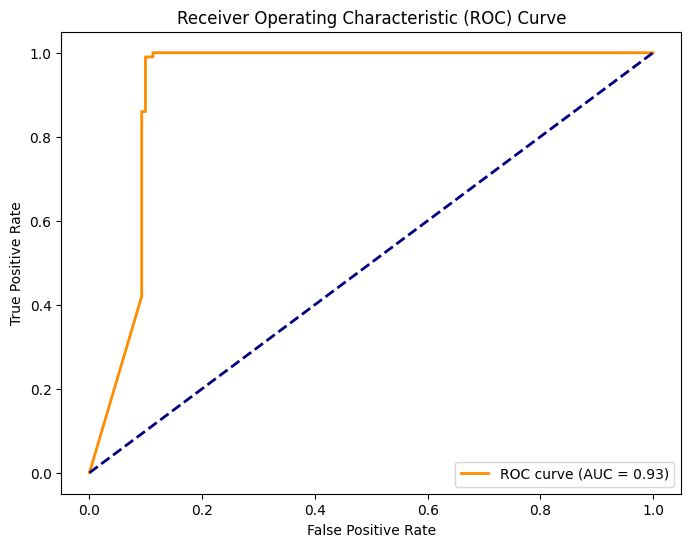

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

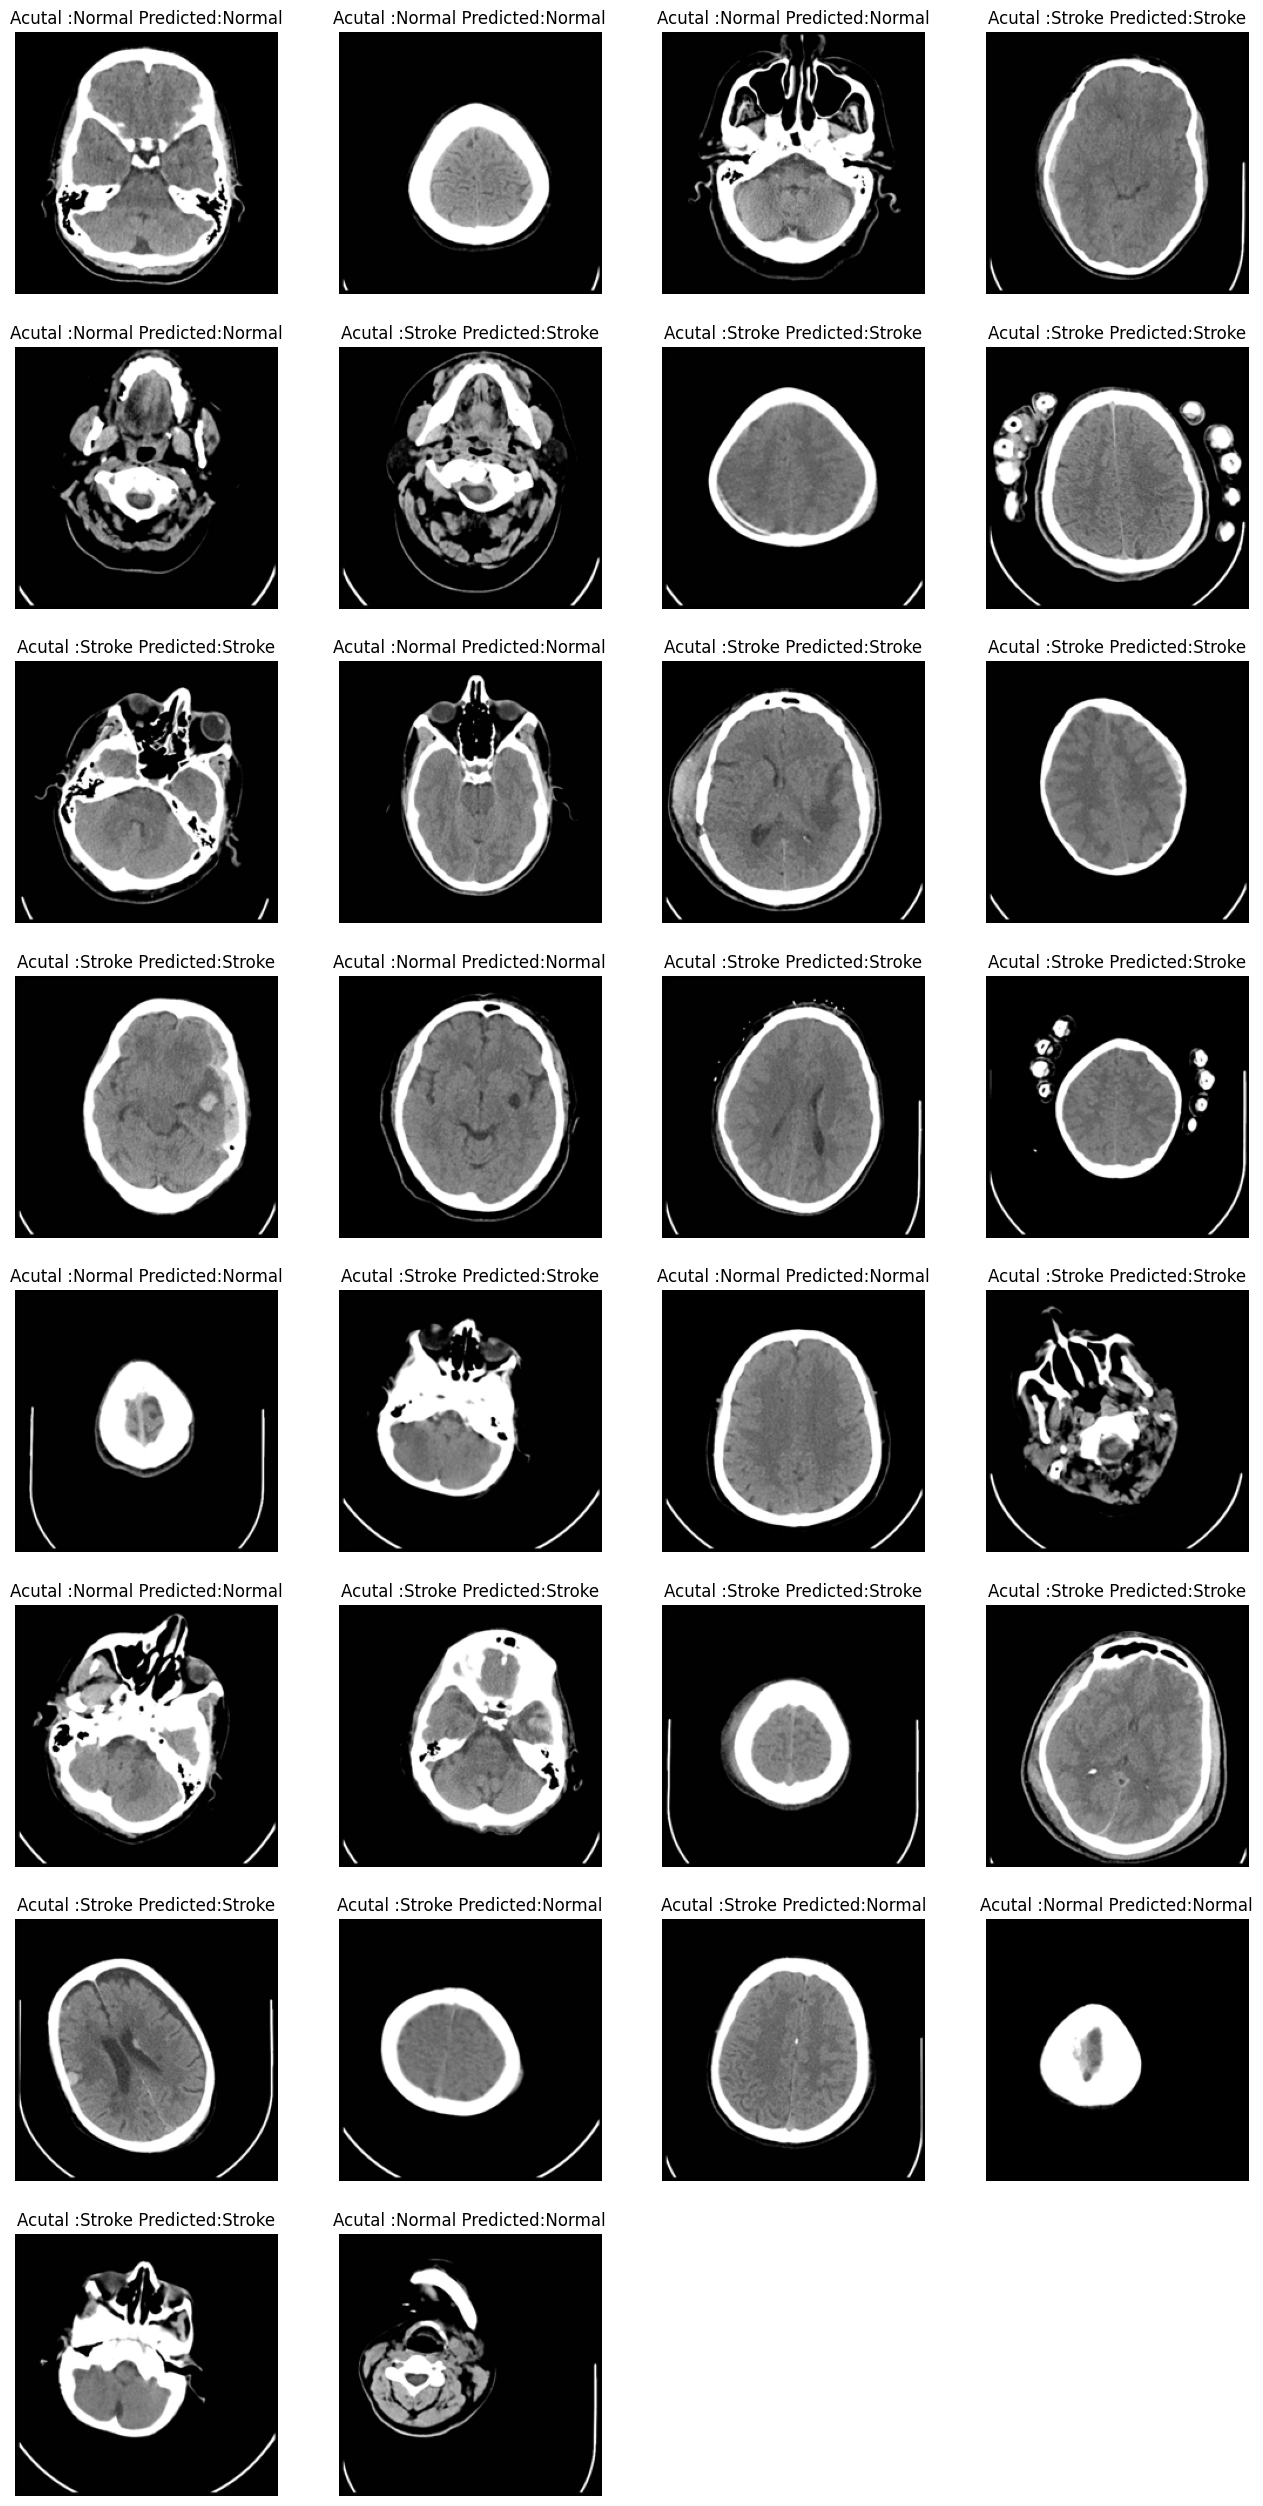

In [37]:
class_labels=["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Acutal :{class_labels[y_test[i]]} Predicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")